In [2]:
import pandas as pd
import glob
pd.options.mode.chained_assignment = None 

import numpy as np
import matplotlib.pyplot as plt
import datetime

In [2]:
#Haarsteeg level
path5 = "../data/waterschap-aa-en-maas_sewage_2019/sewer_data/data_pump/rg8170_N99"
#Haarsteeg flow
path6 = "../data/waterschap-aa-en-maas_sewage_2019/sewer_data/data_pump/rg8170_99"


## Flow in Haarsteeg

In [3]:
df_flow = pd.concat([pd.read_csv(file) for file in glob.glob(path6 + "/*.csv")], ignore_index = True)
df_flow['TimeStamp'] = pd.to_datetime(df_flow['datumBeginMeting'])

df_flow['Year'] = df_flow['TimeStamp'].dt.year
df_flow['Month'] = df_flow['TimeStamp'].dt.month_name()
df_flow['Day'] = df_flow['TimeStamp'].dt.day
df_flow['Date'] = pd.DatetimeIndex(df_flow.TimeStamp).normalize()

In [4]:
flow_18 = df_flow[df_flow['Year'] == 2018]
flow_19 = df_flow[df_flow['Year'] == 2019]

months18 = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
            'September', 'October', 'November', 'December']
months19 = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August']

In [5]:
def Barplots(months, df):
    plt.rcParams['figure.figsize'] = 6,30
    fig, ax = plt.subplots(len(months),1);
    fig.subplots_adjust(hspace=0.8, wspace=0.4)
    for i, month in enumerate(months):
        group = df[df['Month'] == month].groupby('Day')['hstWaarde'].mean()
        ax[i].bar(np.arange(1,len(group)+1), list(group))
        ax[i].set_title(month + ' flow')
        ax[i].set_xlabel('Day of the month')
        ax[i].set_ylabel('Daily average flow in m³')

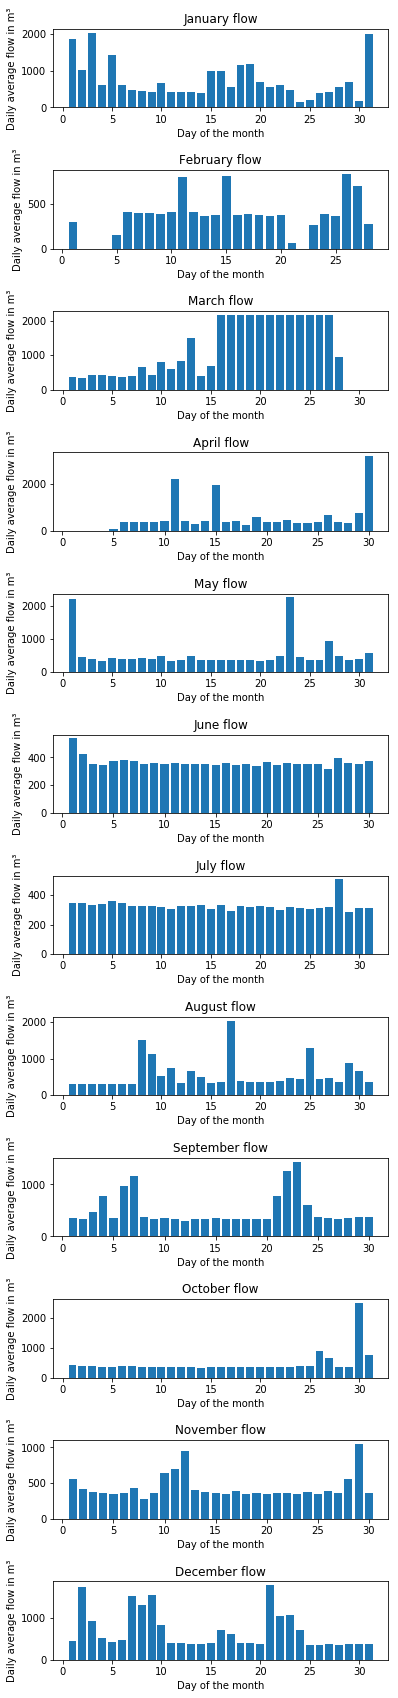

In [6]:
Barplots(months18, flow_18)

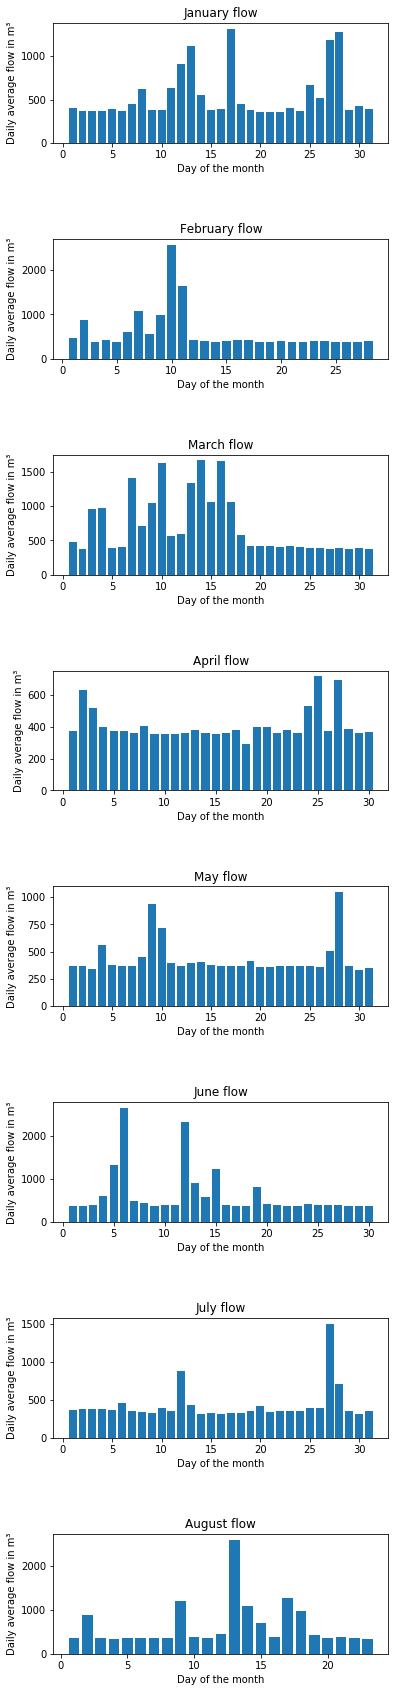

In [7]:
Barplots(months19, flow_19)

In [8]:
# just some testing - ignore

# mond = dry_haar[dry_haar['Weekday'] == 'Monday']
# # g = mond.groupby(['Hour'])[['hstWaarde']].mean()

# # g = mond.groupby(['Hour']).agg(
# #     {
# #         'hstWaarde': ['mean', 'std']
# #     }
# # )
# std_mon = mond['hstWaarde'].std()
# g = mond.groupby(['Hour'])[['hstWaarde']].mean()

# # Create a figure with customized size
# fig = plt.figure(figsize=(20, 5))
# ax = fig.add_subplot(111)

# # Set the axis lables
# ax.set_xlabel('Hour of the day', fontsize = 18)
# ax.set_ylabel('Flow', fontsize = 18)

# xaxis = g.index

# # Create an error bar for each dataset
# # ax.errorbar(xaxis, g['hstWaarde'], yerr=std_mon);
# ax.plot(xaxis, g['hstWaarde']);

## Using Roger's pickle file
## Flow with rain, Haarsteeg & Bokhoven

In [9]:
combined_rain_pump_hour = pd.read_pickle("../data/combined_data/combined_rain_pump_1hour.pickle")
combined_rain_pump_hour.head()

,Haarsteeg,Bokhoven,RG8180_flow,RG8180_level,RG8170_flow,RG8170_level
datumBeginMeting,,,,,,
2017-12-31 23:00:00,0.0000,0.0000,NaN,NaN,NaN,NaN
2018-01-01 00:00:00,0.0124,0.0583,1200.0,61.7,219439.2,-18.5
2018-01-01 01:00:00,0.2245,0.0448,940.0,22.6,201402.8,-50.8
2018-01-01 02:00:00,0.0563,0.1409,0.0,9.6,165302.9,-71.9
2018-01-01 03:00:00,0.0427,0.0714,280.0,3.7,143666.6,-76.4


In [10]:
# add year, month and day to the data
combined_rain_pump_hour['time'] = combined_rain_pump_hour.index
combined_rain_pump_hour['Year'] = combined_rain_pump_hour['time'].dt.year
combined_rain_pump_hour['Month'] = combined_rain_pump_hour['time'].dt.month_name()
combined_rain_pump_hour['Day'] = combined_rain_pump_hour['time'].dt.day

In [11]:
# select data from 2018, 2019
y18 = combined_rain_pump_hour[combined_rain_pump_hour['Year'] == 2018]
y19 = combined_rain_pump_hour[combined_rain_pump_hour['Year'] == 2019]

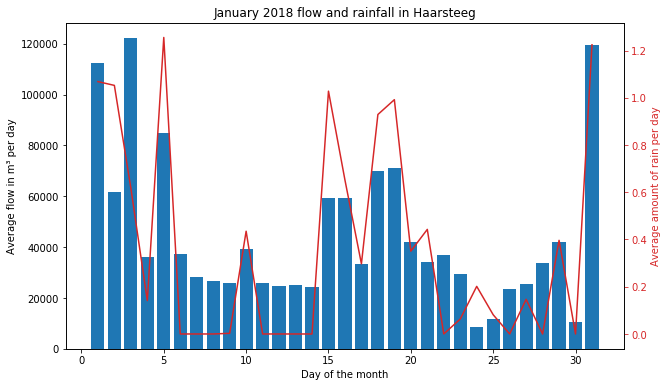

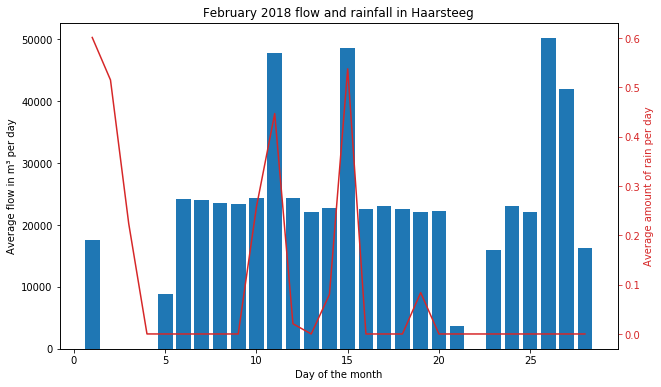

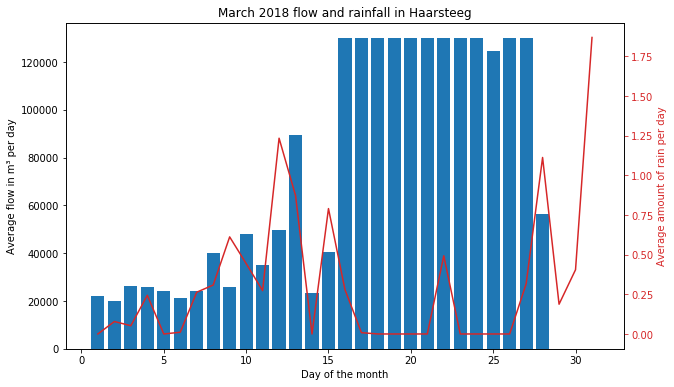

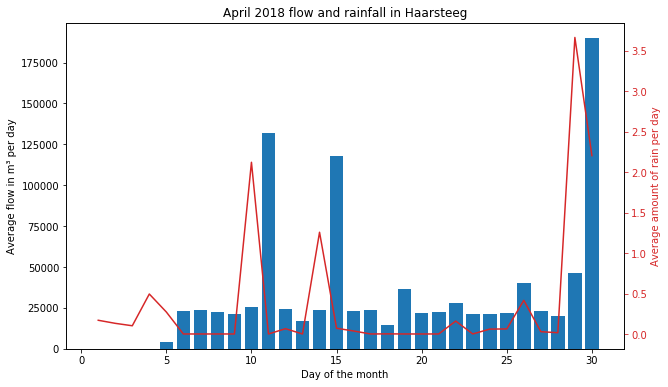

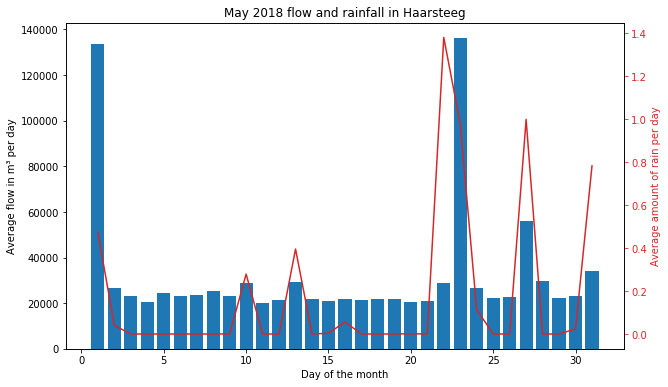

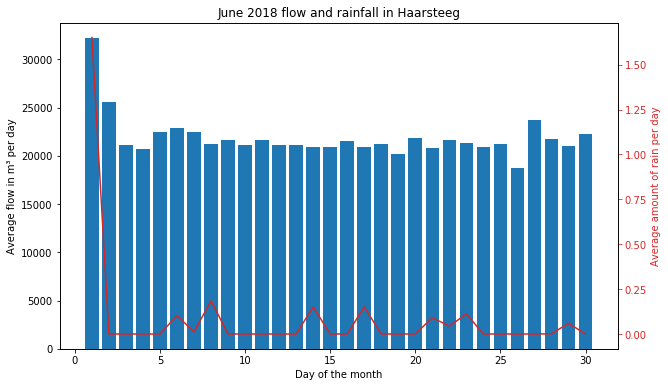

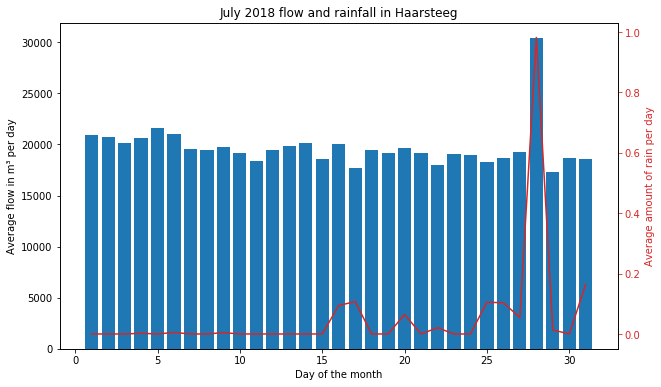

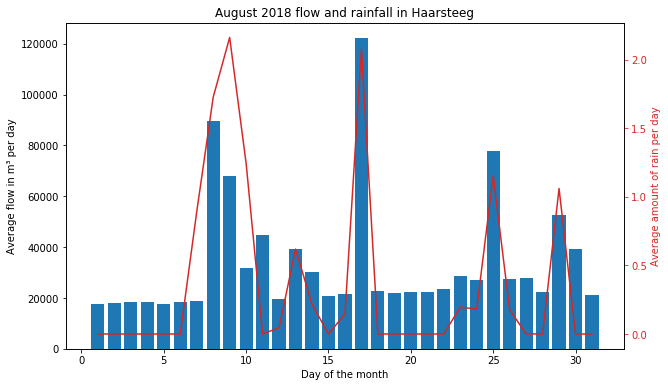

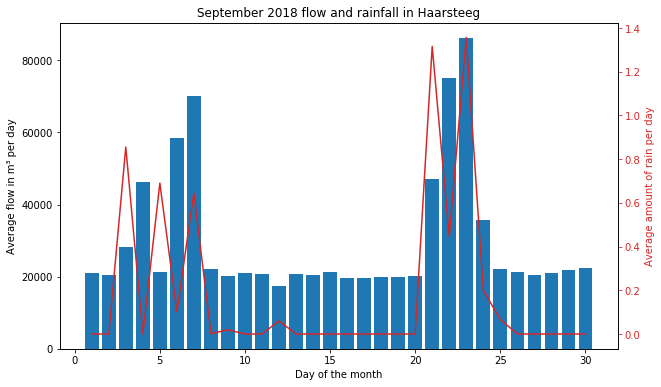

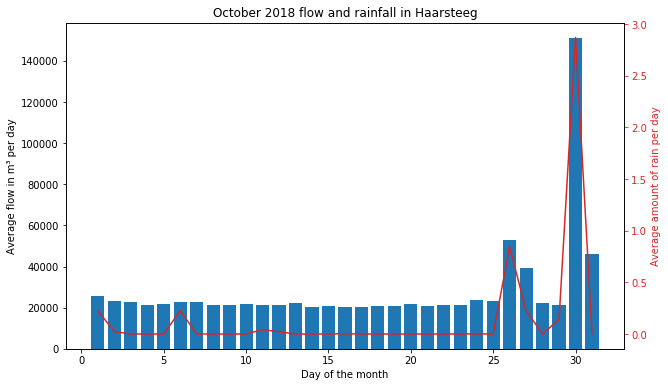

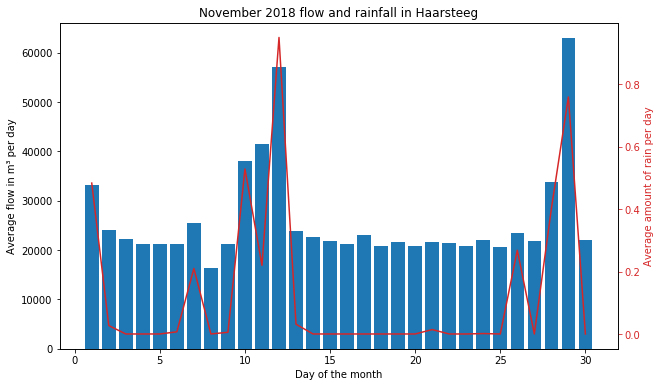

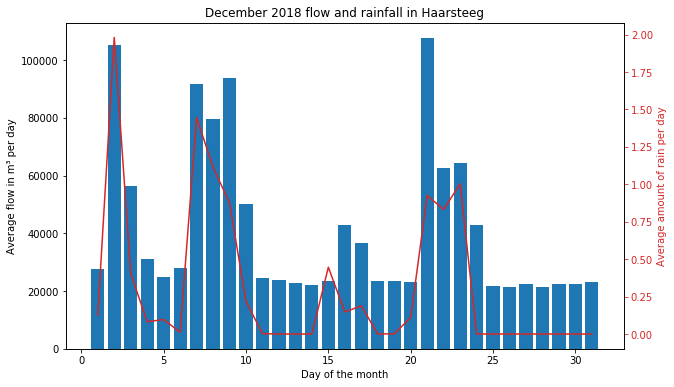

In [12]:
# visualize rain with flow 

plt.rcParams['figure.figsize'] = 10,6
#fig, ax = plt.subplots(12,1);
#fig.subplots_adjust(hspace=0.6, wspace=0.4)
#ax2=ax.twinx()

for i, month in enumerate(months18):
    group = y18[y18['Month'] == month].groupby('Day')[['RG8170_flow', 'RG8170_level', 'Haarsteeg']].mean()
    
    fig, ax = plt.subplots()
    
    ax.bar(np.arange(1, len(group)+1), group['RG8170_flow'])
    ax.set_title(month + ' 2018 flow and rainfall in Haarsteeg')
    ax.set_xlabel('Day of the month')
    ax.set_ylabel('Average flow in m³ per day')
    
    ax2 = ax.twinx()
    color = 'tab:red'
    ax2.plot(np.arange(1, len(group)+1), group['Haarsteeg'], color=color);
    ax2.set_ylabel('Average amount of rain per day', color=color);
    ax2.tick_params(colors=color)

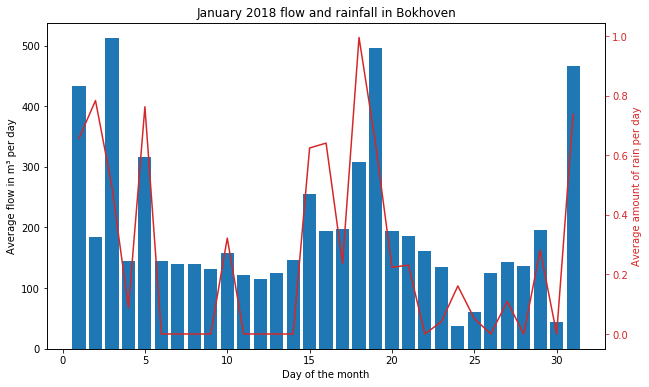

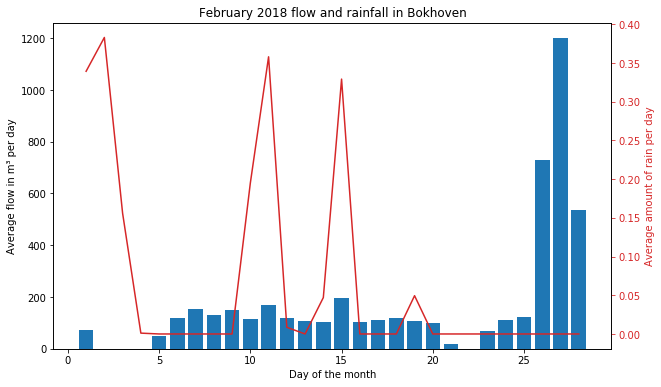

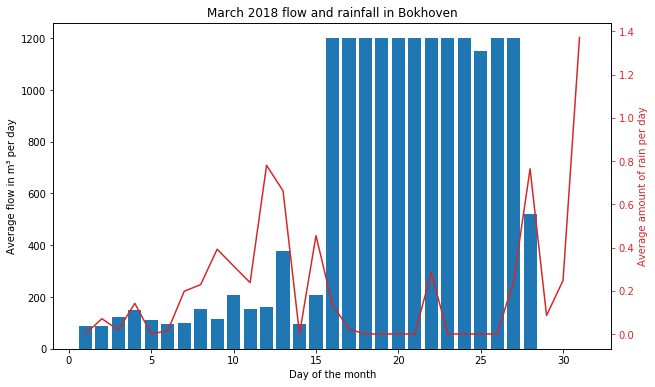

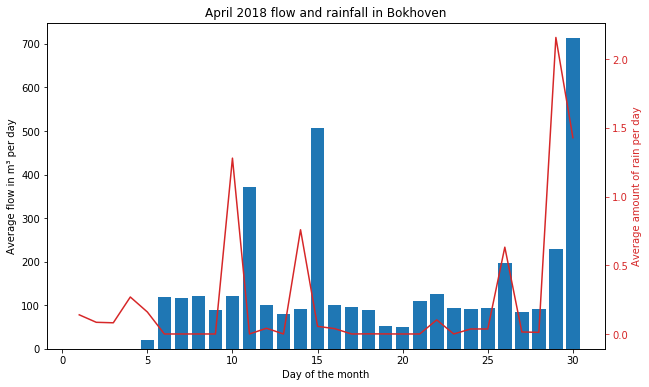

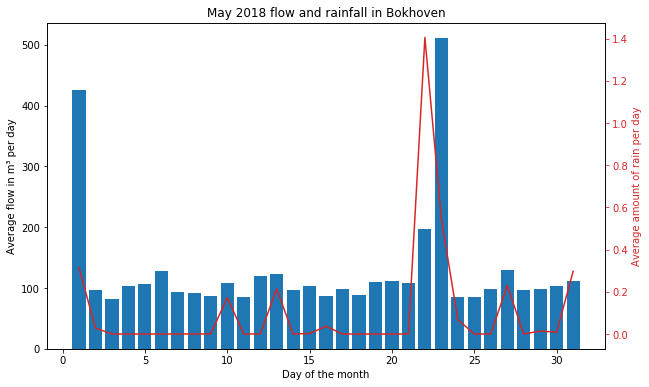

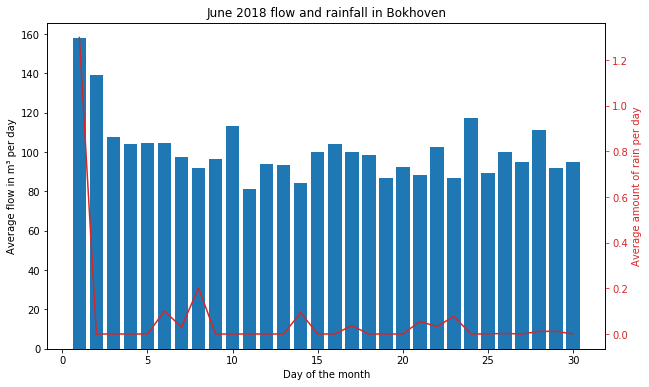

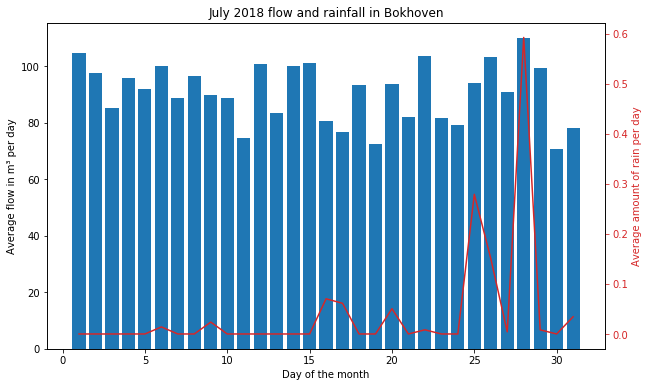

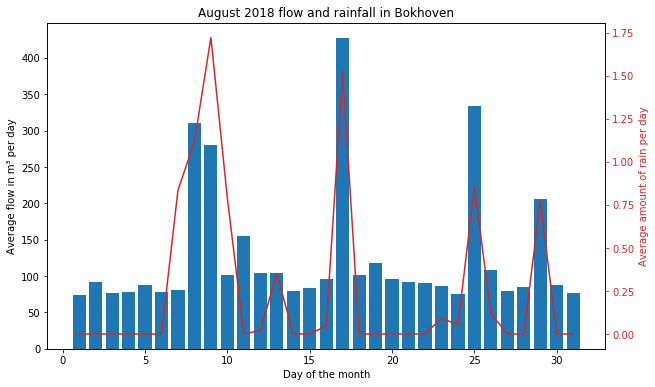

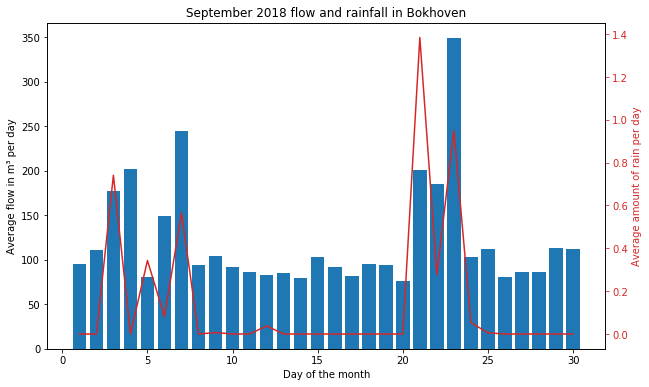

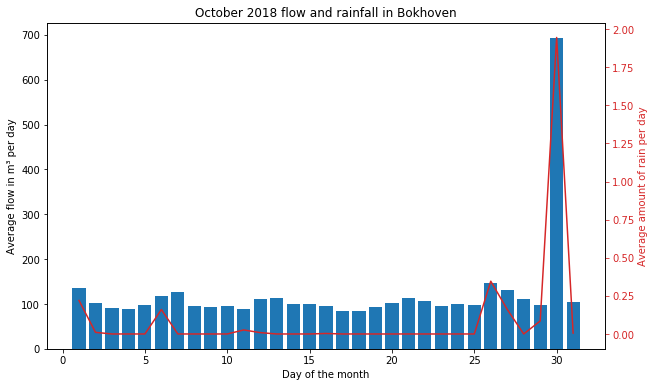

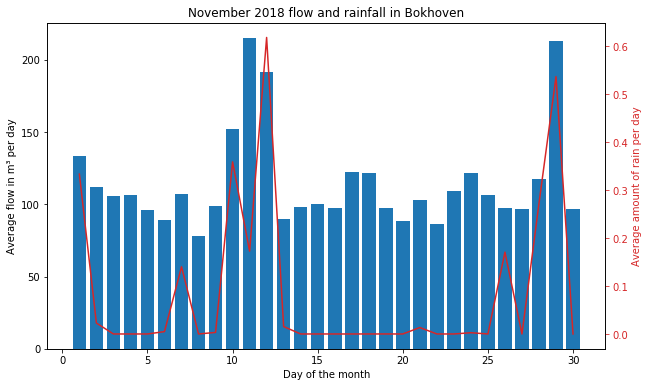

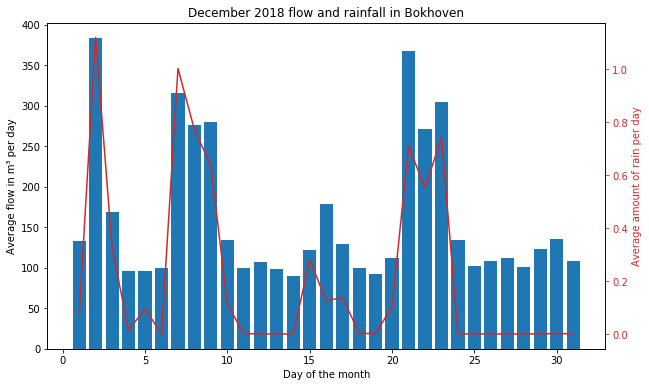

In [13]:
plt.rcParams['figure.figsize'] = 10,6

for i, month in enumerate(months18):
    group = y18[y18['Month'] == month].groupby('Day')[['RG8180_flow', 'RG8180_level', 'Bokhoven']].mean()
    
    fig, ax = plt.subplots()
    
    ax.bar(np.arange(1, len(group)+1), group['RG8180_flow'])
    ax.set_title(month + ' 2018 flow and rainfall in Bokhoven')
    ax.set_xlabel('Day of the month')
    ax.set_ylabel('Average flow in m³ per day')
    
    ax2 = ax.twinx()
    color = 'tab:red'
    ax2.plot(np.arange(1, len(group)+1), group['Bokhoven'], color=color);
    ax2.set_ylabel('Average amount of rain per day', color=color);
    ax2.tick_params(colors=color);

# average dry day flow per weekday with sd

In [14]:
# add extra variables date, weekday and hour
combined_rain_pump_hour['Date'] = pd.DatetimeIndex(combined_rain_pump_hour.time).normalize()
combined_rain_pump_hour['Weekday'] = combined_rain_pump_hour['time'].dt.day_name()
combined_rain_pump_hour['Hour'] = combined_rain_pump_hour['time'].dt.hour

# remove one row from 2017
combined_rain_pump_hour = combined_rain_pump_hour[combined_rain_pump_hour['Year'] != 2017]

In [15]:
# select every day from the dataset that was fully dry

rain_sum_day = combined_rain_pump_hour.groupby('Date')[['Haarsteeg', 'Bokhoven']].sum()

# in Haarsteeg
dry_h = rain_sum_day[rain_sum_day['Haarsteeg'] == 0]
dry_haarsteeg = combined_rain_pump_hour.loc[combined_rain_pump_hour['Date'].isin(dry_h.index)]

# in Bokhoven
dry_b = rain_sum_day[rain_sum_day['Bokhoven'] == 0]
dry_bokhoven = combined_rain_pump_hour.loc[combined_rain_pump_hour['Date'].isin(dry_b.index)]

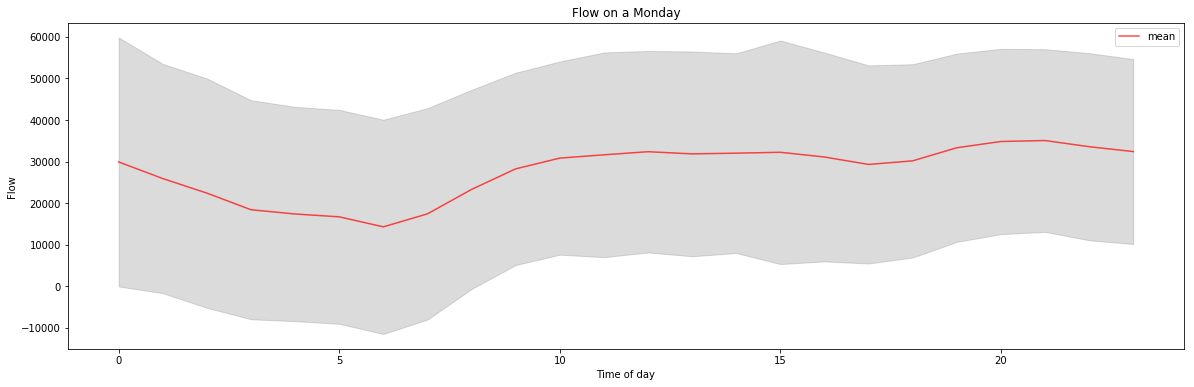

In [16]:
# test vis for dry flow on an average Monday with standard deviation 
mon = dry_haarsteeg[dry_haarsteeg['Weekday'] == 'Monday']
gr = mon.groupby(['Hour']).agg({'RG8170_flow': ['mean', 'std']})

fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(gr.index, gr['RG8170_flow']['mean'], alpha=0.7, color='red', linewidth = 1.5)
ax.fill_between(gr.index, gr['RG8170_flow']['mean'] - gr['RG8170_flow']['std'], gr['RG8170_flow']['mean'] + gr['RG8170_flow']['std'], color='#888888', alpha=0.3)
ax.legend(loc='best')
ax.set_ylabel("Flow")
ax.set_xlabel("Time of day")
ax.set_title('Flow on a Monday');

In [17]:
combined_rain_pump_hour.head()

,Haarsteeg,Bokhoven,RG8180_flow,RG8180_level,RG8170_flow,RG8170_level,time,Year,Month,Day,Date,Weekday,Hour
datumBeginMeting,,,,,,,,,,,,,
2018-01-01 00:00:00,0.0124,0.0583,1200.0,61.7,219439.2,-18.5,2018-01-01 00:00:00,2018,January,1,2018-01-01,Monday,0
2018-01-01 01:00:00,0.2245,0.0448,940.0,22.6,201402.8,-50.8,2018-01-01 01:00:00,2018,January,1,2018-01-01,Monday,1
2018-01-01 02:00:00,0.0563,0.1409,0.0,9.6,165302.9,-71.9,2018-01-01 02:00:00,2018,January,1,2018-01-01,Monday,2
2018-01-01 03:00:00,0.0427,0.0714,280.0,3.7,143666.6,-76.4,2018-01-01 03:00:00,2018,January,1,2018-01-01,Monday,3
2018-01-01 04:00:00,0.0044,0.1340,150.0,20.6,118481.8,-82.3,2018-01-01 04:00:00,2018,January,1,2018-01-01,Monday,4


## using the separate files for Haarsteeg & Bokhoven
Just to be able to do the same vis but with more datapoints per each day

In [18]:
# adding extra variables
# df_flow was defined earlier and is a df with flow for Haarsteeg
df_flow['Weekday'] = df_flow['TimeStamp'].dt.day_name()
df_flow['Hour'] = df_flow['TimeStamp'].dt.hour
df_flow['TimeOfDay'] = df_flow['TimeStamp'].dt.time

# selecting only the measurements on fully dry days
dry_haar = df_flow.loc[df_flow['Date'].isin(dry_h.index)]

In [113]:
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

def SmallIntervalDataPlot(df, weekdays):
    '''
    Input:  df with flow data of a pump only on dry days
            list of weekdays
    Output: 7 lineplots with the shaded area marking the area one standard deviation away from each measurement
    '''
    for weekday in weekdays:

        day = df[df['Weekday'] == weekday]
        g = day.groupby(['Hour']).agg({'hstWaarde': ['mean', 'std']})

        fig, ax = plt.subplots(figsize=(20, 6))
        ax.grid()
        ax.plot(g.index ,g['hstWaarde']['mean'], alpha=0.7, color='red', linewidth = 1.5)
        ax.fill_between(g.index, g['hstWaarde']['mean'] - g['hstWaarde']['std'], g['hstWaarde']['mean'] + g['hstWaarde']['std'], color='#888888', alpha=0.3)
        ax.set_ylabel("Flow", fontsize=15)
        ax.set_xlabel("Time of day", fontsize=15)
        ax.set_title('Flow on a ' + weekday, fontsize=18);

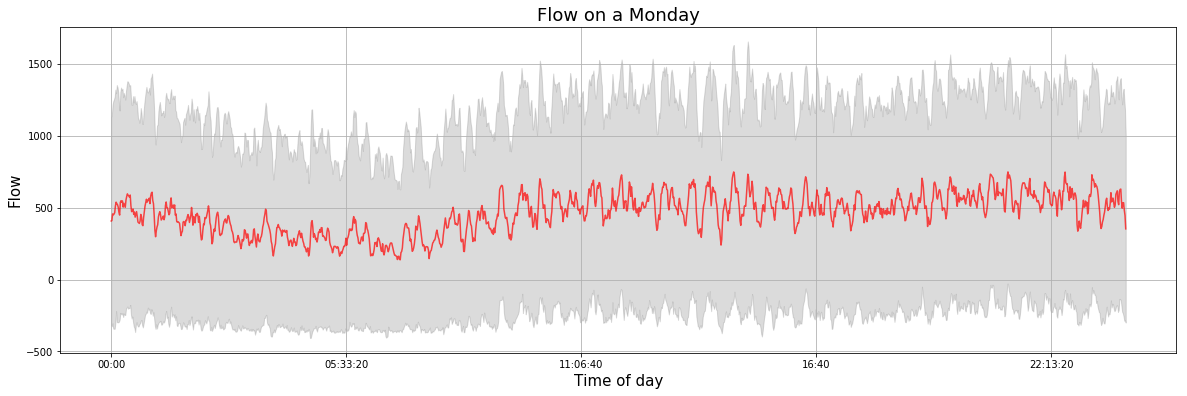

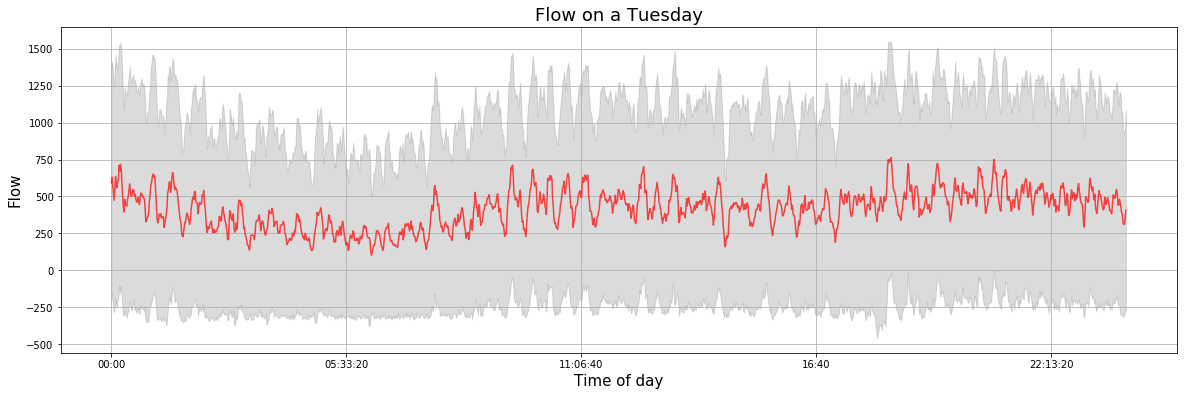

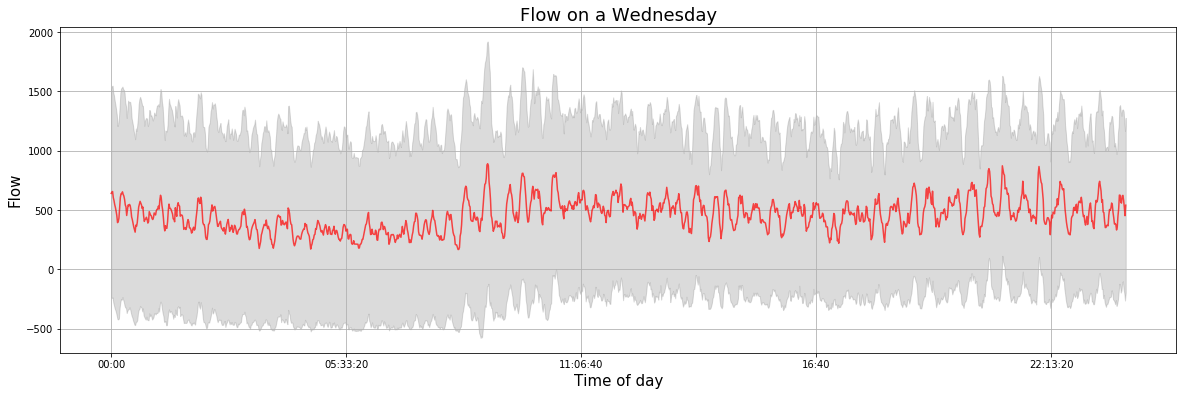

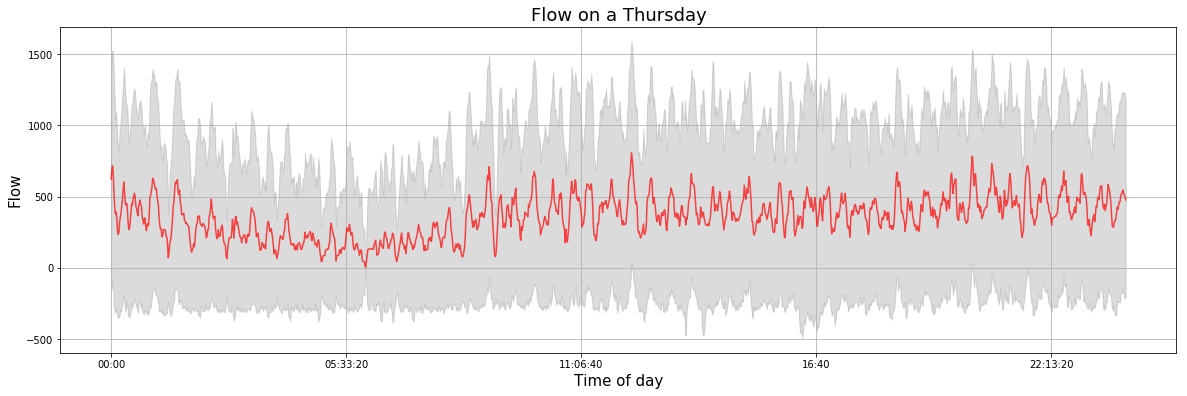

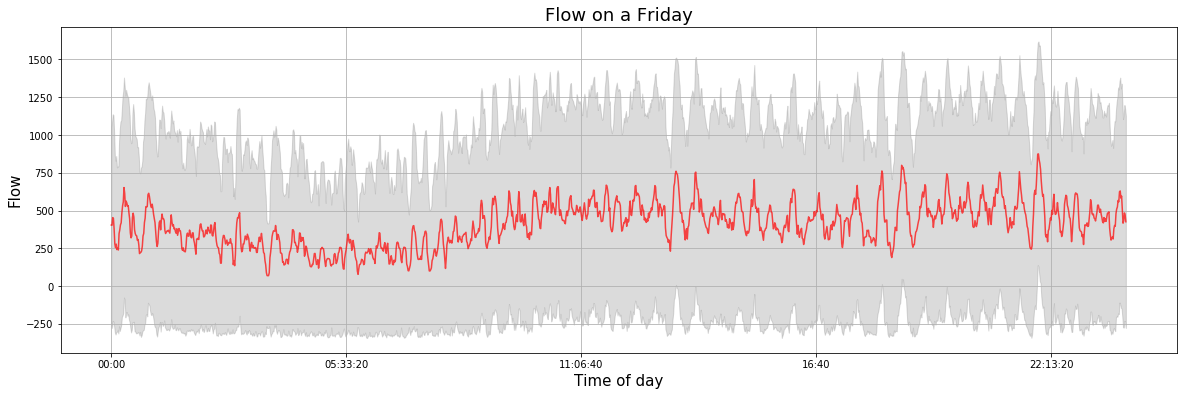

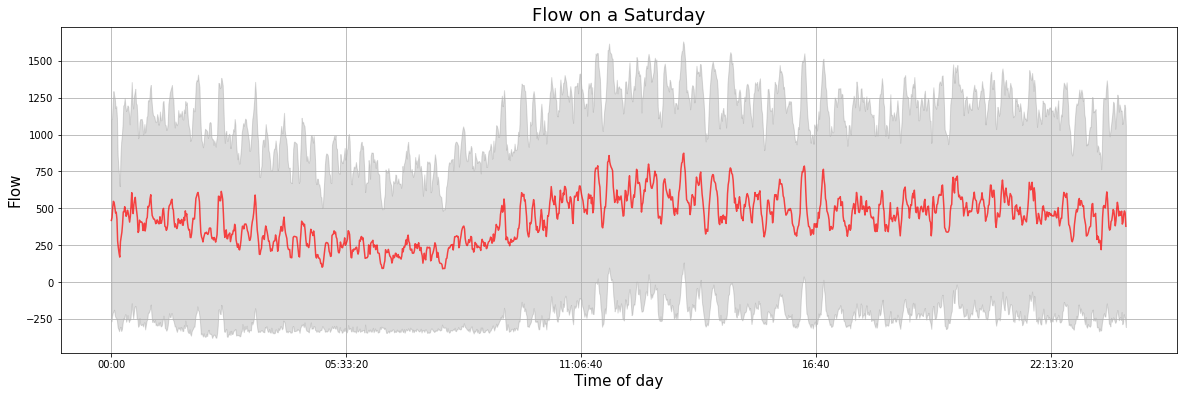

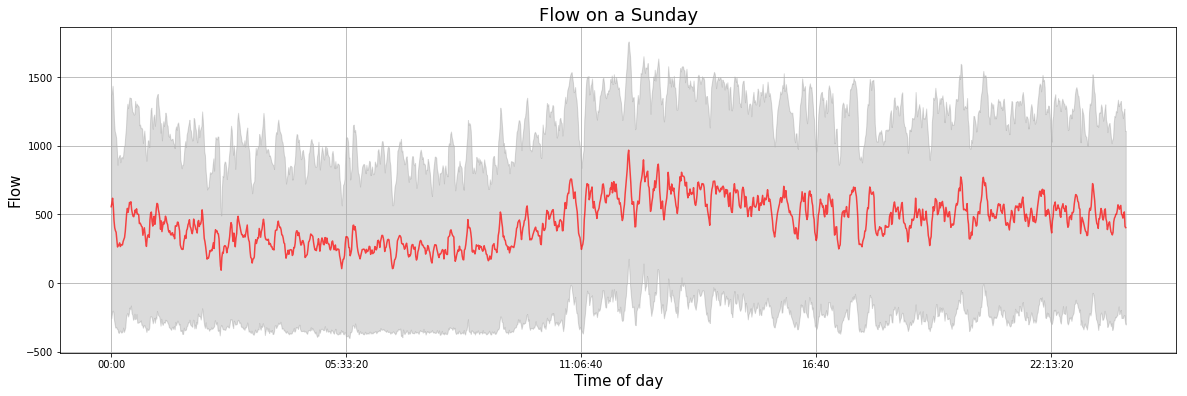

In [20]:
# plots for dry days in Haarsteeg
SmallIntervalDataPlot(dry_haar, weekdays)

In [127]:
# season_names = ['winter', 'spring', 'summer', 'autumn']
# for i in range(4):
#     print(season_names[i], '- Mean: ', seasons[i]['hstWaarde'].mean(), ', Sd: ', seasons[i]['hstWaarde'].std())

winter - Mean:  29139.991054739654 , Sd:  27007.045557517038
spring - Mean:  34092.05749103942 , Sd:  35182.18321343993
summer - Mean:  27304.06048218027 , Sd:  28633.298008510035
autumn - Mean:  23545.476343335646 , Sd:  17402.505950329345


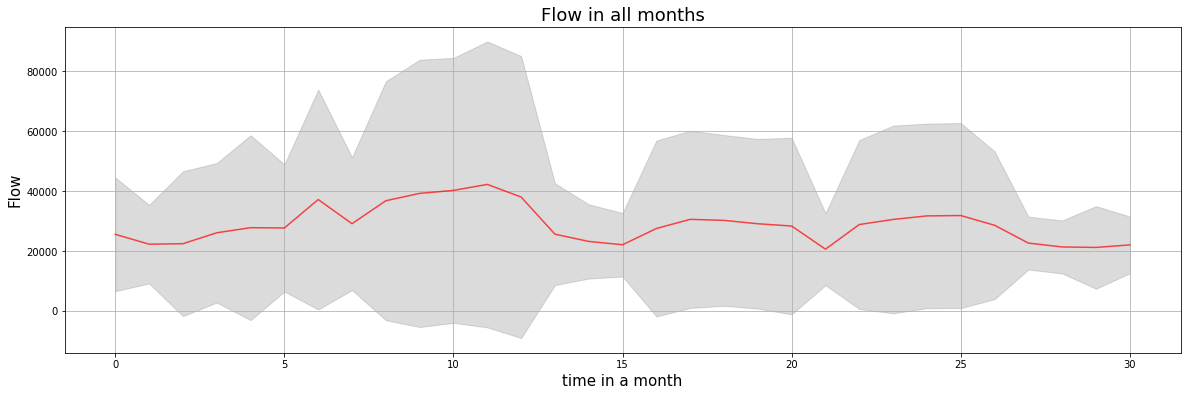

In [233]:
# SeasonalAverageFlow(haar_dry_dry, 'all')

# NEW DATA
## Next cell is full of all the functions I used

In [87]:
# FOR PLOTTING

def DryWorkdayVsWeekendPlot(df, pump_name, sd = False):

    workday = df.loc[(df["Weekday"] == 'Monday') | (df["Weekday"] == 'Tuesday') | (df["Weekday"] == 'Wednesday') | 
                     (df["Weekday"] == 'Thursday') | (df["Weekday"] == 'Friday')]
    g_work = workday.groupby(['Hour']).agg({'hstWaarde': ['mean', 'std']})
    
    weekend = df.loc[(df["Weekday"] == 'Saturday') | (df["Weekday"] == 'Sunday')]
    g_end = weekend.groupby(['Hour']).agg({'hstWaarde': ['mean', 'std']})
    
    fig = plt.figure(figsize=(15,10))
    ax = fig.add_subplot(111)
    ax.grid()
    ax.plot(g_work.index ,g_work['hstWaarde']['mean'], alpha=0.7, color='red', linewidth = 1.5, label='Workday flow')
    ax.plot(g_end.index ,g_end['hstWaarde']['mean'], alpha=0.7, color='blue', linewidth = 1.5, label = 'Weekend flow')
    if sd == True:
        ax.fill_between(g_work.index, g_work['hstWaarde']['mean'] - g_work['hstWaarde']['std'], g_work['hstWaarde']['mean'] + g_work['hstWaarde']['std'], color='#888888', alpha=0.3)
    plt.xticks(np.arange(min(g_work.index), max(g_work.index)+1, 2.0))
    ax.set_ylabel("Flow (m³/h)", fontsize=15)
    ax.set_xlabel("Hour of the day", fontsize=15)
    ax.legend()
    ax.set_title(pump_name + ': Flow on workdays vs weekend on dry days', fontsize=18);
    
def SeasonalAverageFlow(df, pump_name, add_hour = False):
    
    seasons_df = SeasonalDf(df)
    season_names = ['winter', 'spring', 'summer', 'autumn']
    
    fig, ax = plt.subplots(4, figsize=(20, 24))
    for i in range(4):
        if add_hour == True:
            g = seasons_df[i].groupby(['Day', 'Hour']).agg({'hstWaarde': ['mean', 'std']})
        else:
            g = seasons_df[i].groupby(['Day']).agg({'hstWaarde': ['mean', 'std']})
        ax[i].grid()
        ax[i].plot(g.index, g['hstWaarde']['mean'], alpha=0.7, color='red', linewidth = 1.5)
        ax[i].fill_between(g.index, g['hstWaarde']['mean'] - g['hstWaarde']['std'], g['hstWaarde']['mean'] + g['hstWaarde']['std'], color='#888888', alpha=0.3)
        ax[i].xaxis.set_ticks(np.arange(min(g.index), max(g.index)+1, 5.0))
        ax[i].set_ylabel("Flow (m³/h)", fontsize=15)
        ax[i].set_xlabel("Day in the month", fontsize=15)
        ax[i].set_title(pump_name + ': Flow in ' + season_names[i] + ' months', fontsize=18);
    fig.savefig("../graphs/"+ pump_name +"SeasonalAvgFlow.png")
        
def MonthlyAverageBar(df, pump_name, condition):
    
    gru = df.groupby(['Year', 'Month'], sort=False).agg({'hstWaarde': ['mean', 'std', 'count', 'median', 'sum']})
    xaxis = ['Jan 18', 'Feb 18', 'March 18', 'April 18', 'May 18', 'June 18', 'July 18', 'Aug 18',
             'Sep 18', 'Oct 18', 'Nov 18', 'Dec 18', 'Jan 19', 'Feb 19', 'March 19', 'April 19', 
             'May 19', 'June 19', 'July 19', 'Aug 19']
    fig, ax = plt.subplots(figsize=(20, 8))
    ax.grid()
    ax.bar(xaxis, gru['hstWaarde']['mean'], yerr=gru['hstWaarde']['std'], align='center', alpha=0.5, ecolor='black', capsize=10);
    ax.set_ylabel("Average flow", fontsize=15)
    ax.set_xlabel("Month", fontsize=15);
    ax.set_title(pump_name + ': Average flow of every month in the timespan on ' + condition + ' days', fontsize=18);
    ax.tick_params(axis='both', which='major', labelsize=14)
    plt.xticks(rotation=45);
    fig.savefig("../graphs/"+ pump_name + condition + "MontlyAvgFlow.png")
    
def PLotSelectedMonth(df, pump_name, condition, month, year):
   
    df = df[df['Month'] == month]
    df = df[df['Year'] == year]
    
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.grid()
    ax.plot(df['Date'], df['hstWaarde']);
    ax.set_ylabel("Flow (m³/h)", fontsize=15)
    ax.set_xlabel("Date", fontsize=15);
    ax.set_title(pump_name + ': Flow in ' + month + ' ' + str(year) + ' on ' + condition + ' days', fontsize=18);   

################################################################################################
# FOR PREPARATION

def AddColumns(df):
    df['Begin'] = pd.to_datetime(df['Begin'])
    df['Date'] = pd.DatetimeIndex(df.Begin).normalize()
    df['Weekday'] = df['Begin'].dt.day_name()
    df['Hour'] = df['Begin'].dt.hour
    df['TimeOfDay'] = df['Begin'].dt.time
    df['Year'] = df['Begin'].dt.year
    df['Month'] = df['Begin'].dt.month_name()
    df['Day'] = df['Begin'].dt.day
    return df

def DryHours(df, pump_name):
    '''
    Input:      - df with data per pump
                - string of the pump name (to access the rain column)
    Output:     - df with only dry hours according to our definition
    '''
    dry = df[df['rain_-15_class'] == 0]
#     dry = dry[dry[pump_name] <= 0.05*5/8] # remove later when dry days are fixed
    return dry

def RainyHours(df, pump_name):
    '''
    Input:      - df with data per pump
                - string of the pump name (to access the rain column)
    Output:     - df with only rainy hours according to our definition
    '''
    wet = df[df['rain_-15_class'] == 1]
    return wet

def SeasonalDf(df):
    '''
    Input:      - df with data per pump
    Output:     - list of 4 df's so a df per season
    '''
    winter = df.loc[(df["Month"] == 'December') | (df["Month"] == 'January') | (df["Month"] == 'February')]
    spring = df.loc[(df["Month"] == 'March') | (df["Month"] == 'April') | (df["Month"] == 'May')]
    summer = df.loc[(df["Month"] == 'June') | (df["Month"] == 'July') | (df["Month"] == 'August')]
    autumn = df.loc[(df["Month"] == 'September') | (df["Month"] == 'October') | (df["Month"] == 'November')]
    
    season_dfs = [winter, spring, summer, autumn]
    return season_dfs

################################################################################################
# A FUNCTION TO DO ALL THE MAIN PLOTS

def DoAllPlots(file, pump_name ):
    '''
    Input:      - file together with the path: '../data/file name here'
                    - (for now i use the code from forecaster.py to generate csv's for pumps and save them in the data folder
                - string of the pump name (to access the rain column)
    Output:     - a bunch of plots hopefully
    '''
    # read in the pump data
    pump_df = pd.read_csv(file)
    
    # add extra columns
    pump_df = AddColumns(pump_df)
    
    # split between dry and rainy hours
    dry = DryHours(pump_df, pump_name)
    rainy = RainyHours(pump_df, pump_name)
    
    # plot workday vs weekend on dry days
    DryWorkdayVsWeekendPlot(dry, pump_name, sd = False)
    
    # plot seasonal flow for dry data
    SeasonalAverageFlow(dry, pump_name)
    
    # plot barplot with average flow per month in the data for dry and rainy days
    MonthlyAverageBar(dry, pump_name, 'dry')
    MonthlyAverageBar(rainy, pump_name, 'rainy')

I saved the flow dataframes generated in forecaster.py as csv files for convenience here <br>
For now they are just chilling in the data folder

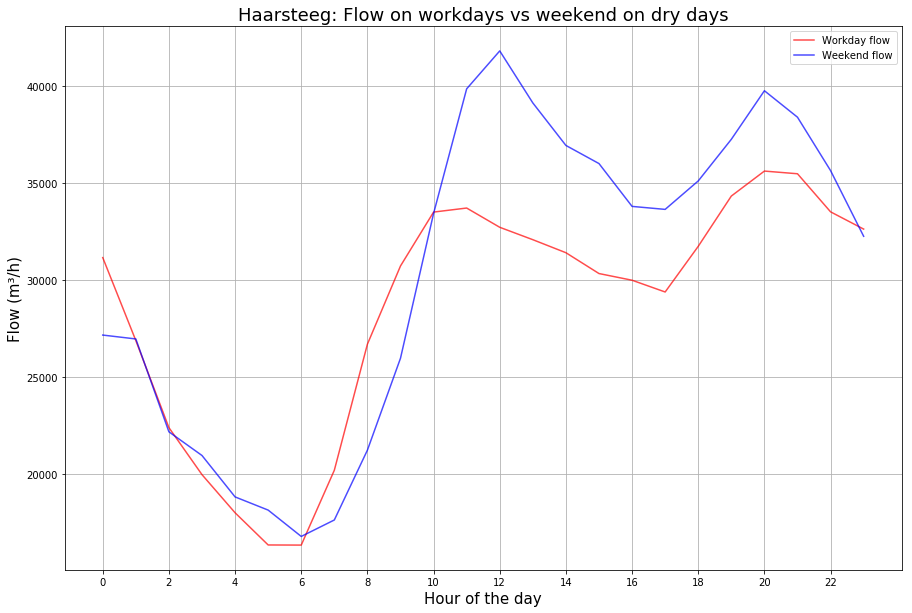

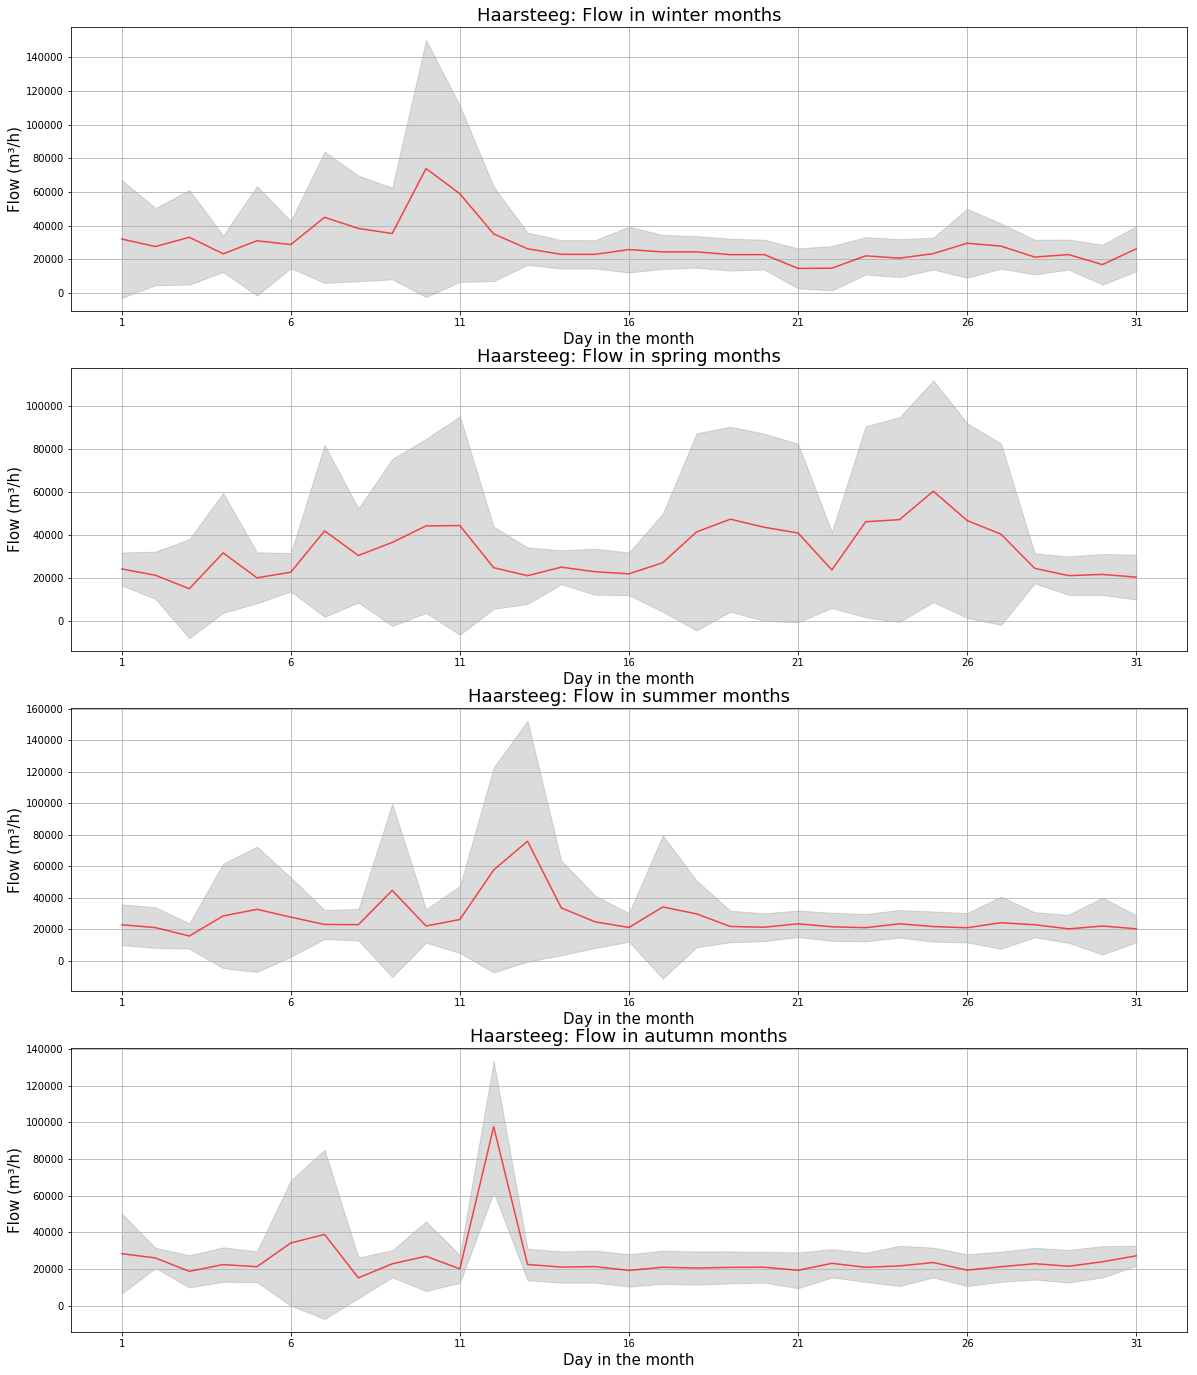

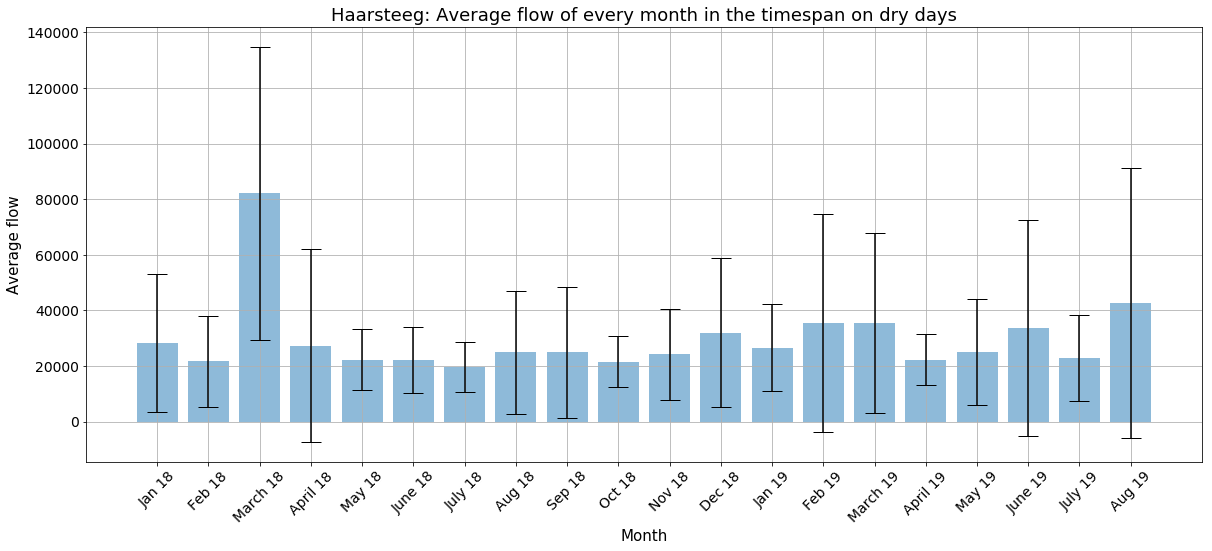

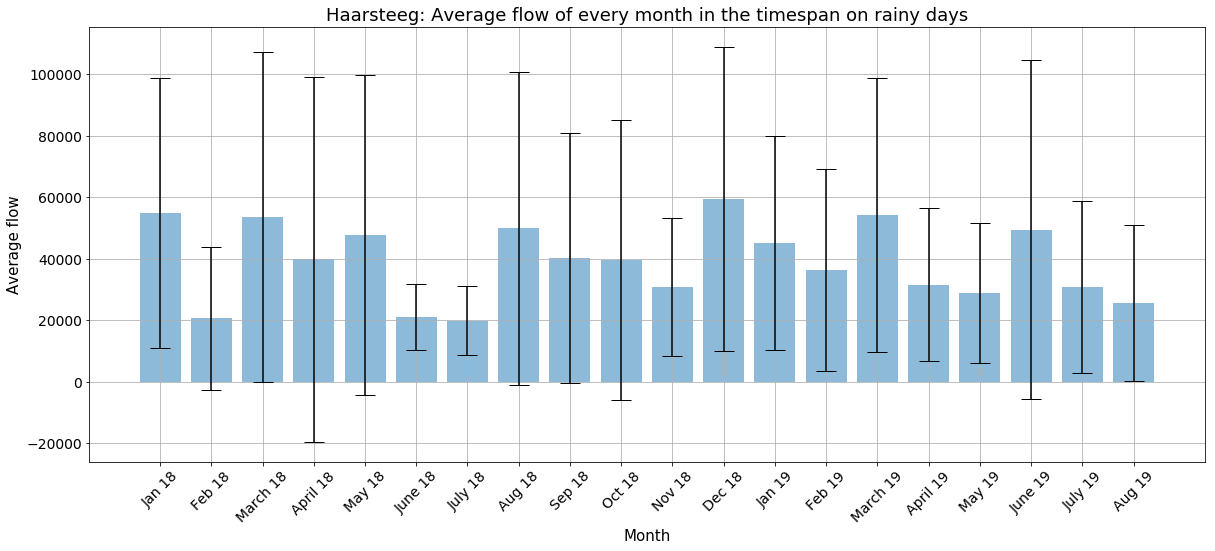

In [96]:
DoAllPlots('../data/haarsteeg.csv', 'Haarsteeg')

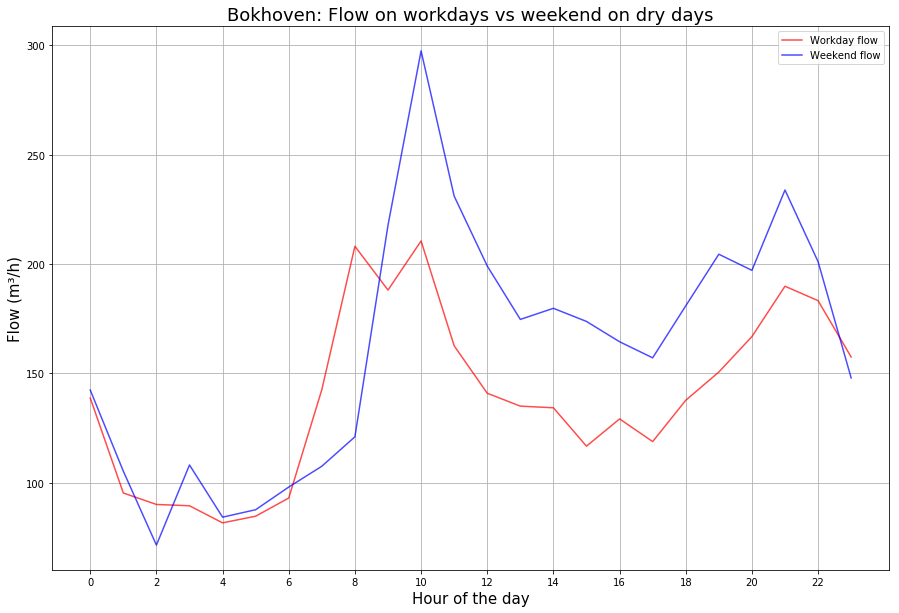

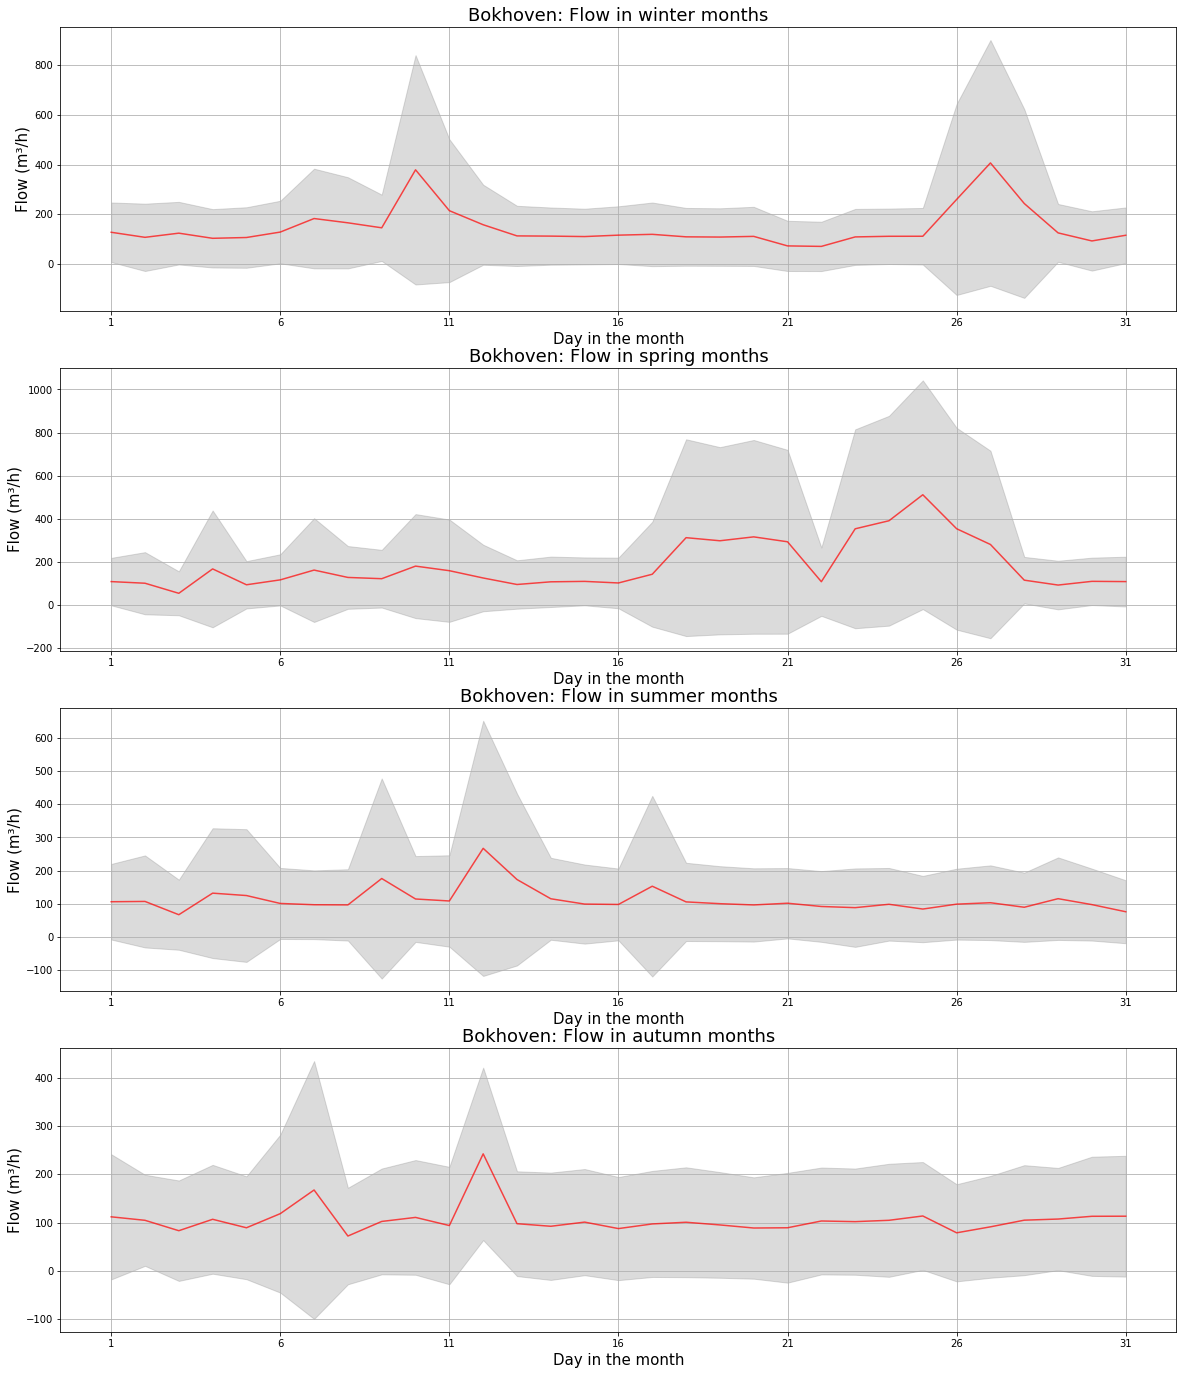

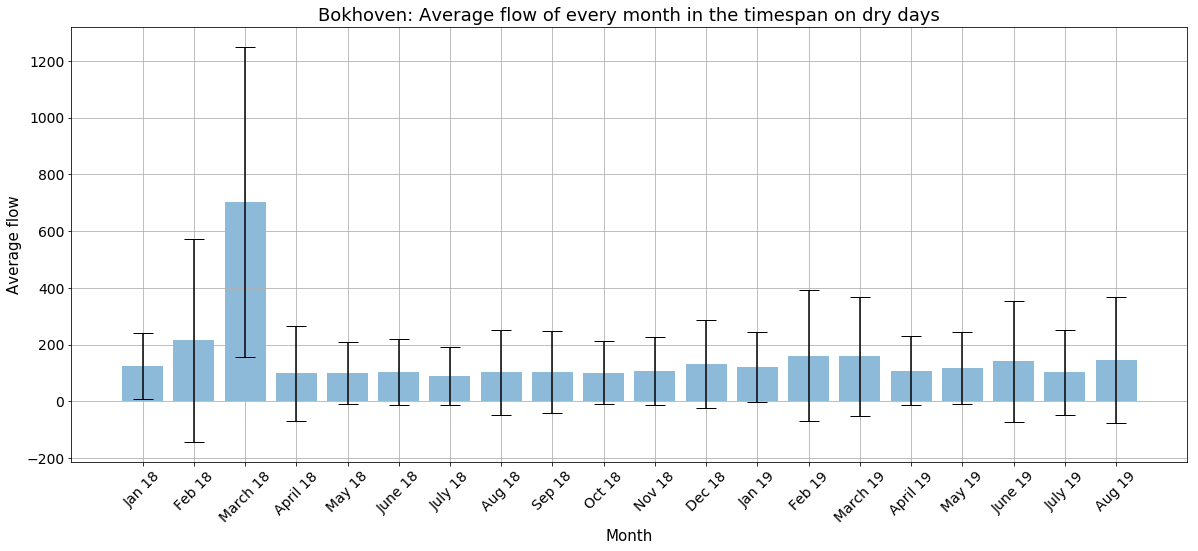

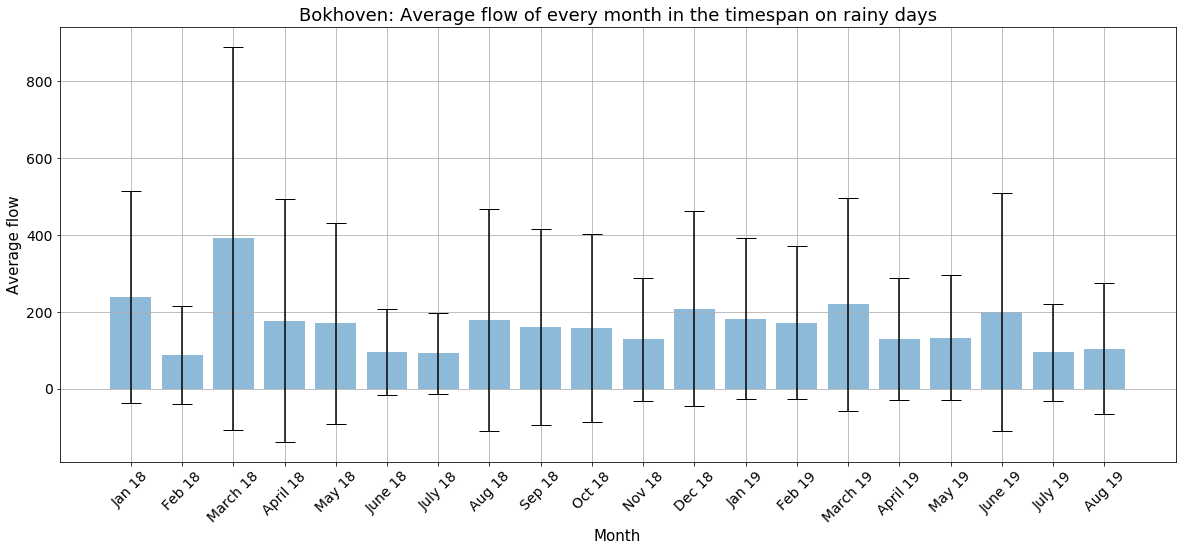

In [97]:
DoAllPlots('../data/bokhoven.csv', 'Bokhoven')

## some separate looking into things

In [ ]:
new_haar = pd.read_csv('../data/haarsteeg.csv')
new_haar

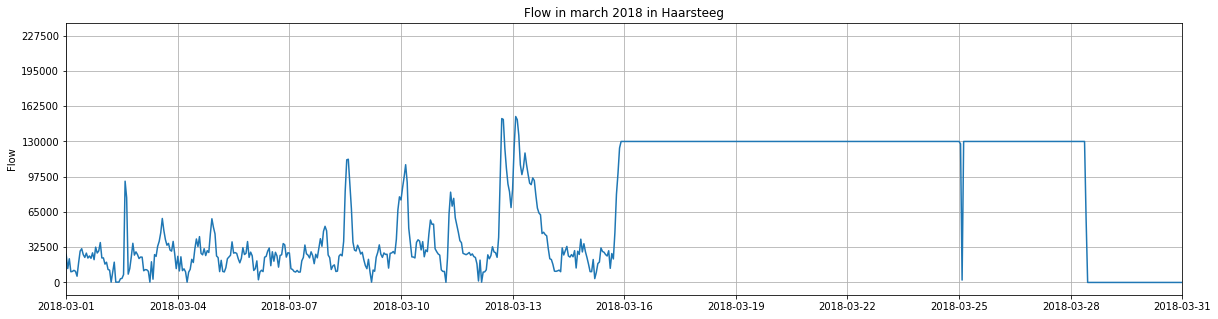

In [92]:
fig, ax = plt.subplots(figsize=(20,5))
ax.grid()
ax.plot(new_haar['Begin'], new_haar['hstWaarde'])
ax.set_xlim([datetime.date(2018, 3, 1), datetime.date(2018, 3, 31)]);
plt.yticks(np.arange(0, max(new_haar['hstWaarde']), 32500.0))
ax.set_ylabel('Flow')
ax.set_title('Flow in march 2018 in Haarsteeg');

In [348]:
mar18 = new_haar[new_haar['Year'] == 2018]
mar18 = mar18[mar18['Month'] == 'March']
mar18['hstWaarde'].value_counts()

130002.0    298
0.0          85
276.0         7
34505.8       1
36121.4       1
           ... 
123981.3      1
11257.6       1
64039.9       1
68016.7       1
9480.0        1
Name: hstWaarde, Length: 357, dtype: int64

In [93]:
bok = pd.read_csv('../data/bokhoven.csv')
bok = AddColumns(bok)

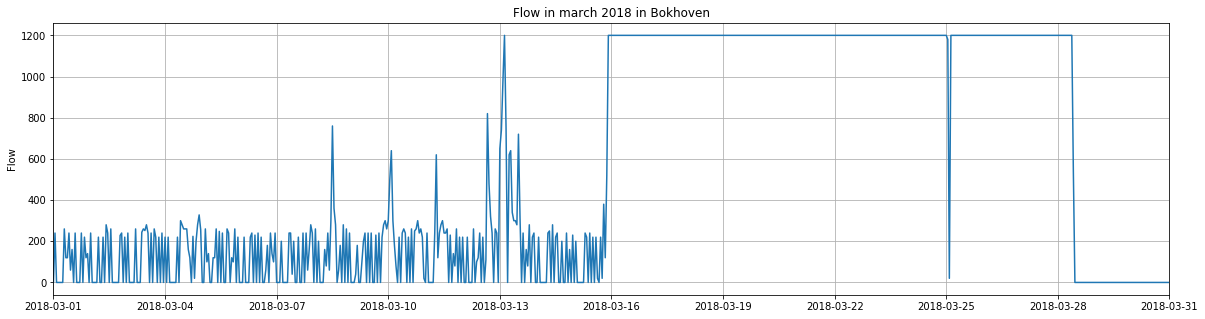

In [94]:
fig, ax = plt.subplots(figsize=(20, 5))
ax.grid()
ax.plot(bok['Begin'], bok['hstWaarde'])
ax.set_xlim([datetime.date(2018, 3, 1), datetime.date(2018, 3, 31)]);
ax.set_ylabel('Flow')
ax.set_title('Flow in march 2018 in Bokhoven');

From cell above and below it can be seen that flow stays constant between <br> 
__2018-03-15 22:00:00 and 2018-03-28 09:00:00__ <br> 
with one drop to 0 around the 25th

In [95]:
weird_bok = bok[bok['Month'] == 'March']
weird_bok = weird_bok[weird_bok['Year'] == 2018]
weird_bok = weird_bok.sort_values(by=['Begin'])
weird_bok = weird_bok[weird_bok['hstWaarde'] == 1200]
weird_bok

,Unnamed: 0,datumBeginMeting,hstWaarde,Bokhoven,Begin,cumsum_previous_15,rain_-15_class,Date,Weekday,Hour,TimeOfDay,Year,Month,Day
1707,1707,2018-03-13 03:00:00,1200.0,0.5036,2018-03-13 03:00:00,7.3298,1,2018-03-13,Tuesday,3,03:00:00,2018,March,13
1774,1774,2018-03-15 22:00:00,1200.0,0.1485,2018-03-15 22:00:00,10.9176,1,2018-03-15,Thursday,22,22:00:00,2018,March,15
1775,1775,2018-03-15 23:00:00,1200.0,0.0000,2018-03-15 23:00:00,10.9176,1,2018-03-15,Thursday,23,23:00:00,2018,March,15
1776,1776,2018-03-16 00:00:00,1200.0,0.1421,2018-03-16 00:00:00,11.0597,1,2018-03-16,Friday,0,00:00:00,2018,March,16
1777,1777,2018-03-16 01:00:00,1200.0,0.0110,2018-03-16 01:00:00,11.0707,1,2018-03-16,Friday,1,01:00:00,2018,March,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2069,2069,2018-03-28 05:00:00,1200.0,0.0000,2018-03-28 05:00:00,3.9070,1,2018-03-28,Wednesday,5,05:00:00,2018,March,28
2070,2070,2018-03-28 06:00:00,1200.0,0.0000,2018-03-28 06:00:00,3.1491,1,2018-03-28,Wednesday,6,06:00:00,2018,March,28
2071,2071,2018-03-28 07:00:00,1200.0,0.6760,2018-03-28 07:00:00,2.9762,1,2018-03-28,Wednesday,7,07:00:00,2018,March,28
2072,2072,2018-03-28 08:00:00,1200.0,0.3806,2018-03-28 08:00:00,2.1141,1,2018-03-28,Wednesday,8,08:00:00,2018,March,28


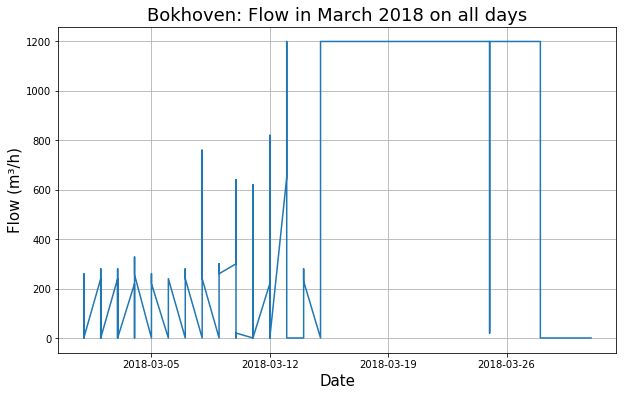

In [88]:
PLotSelectedMonth(bok, 'Bokhoven', 'all', 'March', 2018)

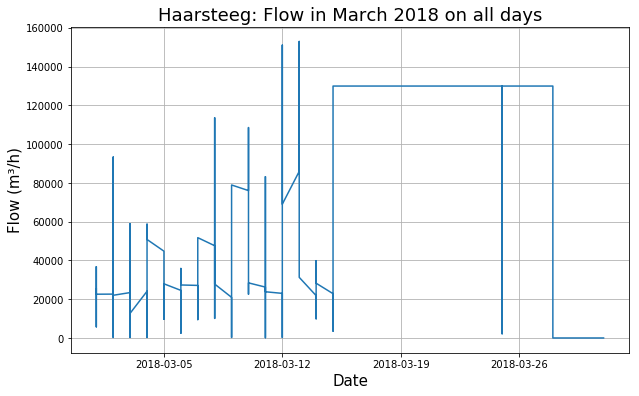

In [89]:
PLotSelectedMonth(new_haar, 'Haarsteeg', 'all', 'March', 2018)